Multi Class Classification on MNIST fashion dataset


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
# The data has already been sorted in train and test
(train_data,train_labels),(test_data,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
#show the first training example

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print("label={}".format(train_labels[0]))
train_data[0]

label=9


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [3]:
#now lets check the shape of data
train_labels[0].shape,train_data[0].shape

((), (28, 28))

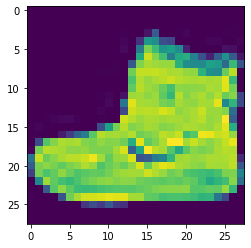

In [5]:
#For detailed analysis lets plot the data
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [6]:
#Lets build a multiclass classification model
#set random seed
tf.random.set_seed=42
#Create the model
minst_model_1=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax")
    ]
)
#Complie the model
minst_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
#model fit
minst_model_1.fit(train_data,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 7ms/step - loss: 2.3087 - accuracy: 0.0972
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.1005
Epoch 3/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.1003
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0991
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0999
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.30

In [7]:
#Lets see how we can use categorical Cross entropy the same model
#Compile the model with categorical cross entropy
minst_model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"]
                      )
#fit the model.
history_1=minst_model_1.fit(train_data,tf.one_hot(train_labels,depth=10),
                            epochs=10,
                            validation_data=(test_data,tf.one_hot(test_labels,depth=10)))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy:

In [8]:
#normalisation
#check the min and max values of the data
train_data.min(),train_data.max()

(0, 255)

Neural networks prefer values between 0 and 1. Lets normalize the data

In [9]:
#We can get our training and testing data betwwen 0 and 1 by dividing the data with the maximum
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0
train_data_norm.min(),test_data_norm.max()

(0.0, 1.0)

In [10]:
train_data_norm[0].shape

(28, 28)

In [11]:
#let use the same model and use the normalised model
#set random seed
tf.random.set_seed=42
#Create the model
minst_model_2=tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation="softmax"),
    ]
)
#Complie the model
minst_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["accuracy"])
#Fit_model
history_2=minst_model_2.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 18s 9ms/step - loss: 1.4120 - accuracy: 0.4541 - val_loss: 0.8982 - val_accuracy: 0.6980
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7560 - accuracy: 0.7388 - val_loss: 0.7077 - val_accuracy: 0.7474
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6570 - accuracy: 0.7687 - val_loss: 0.6652 - val_accuracy: 0.7640
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6202 - accuracy: 0.7844 - val_loss: 0.6467 - val_accuracy: 0.7711
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5993 - accuracy: 0.7932 - val_loss: 0.6264 - val_accuracy: 0.7855
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5869 - accuracy: 0.7997 - val_loss: 0.6292 - val_accuracy: 0.7862
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5794 - accuracy: 0.8018 - val_loss: 0.6171 - val_accuracy

<Axes: title={'center': 'Data with Normalisation'}>

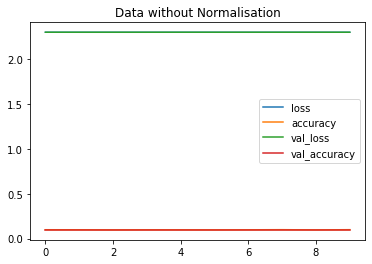

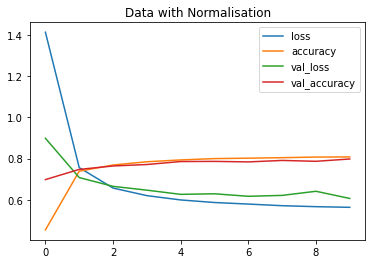

In [12]:
import pandas as pd
pd.DataFrame(history_1.history).plot(title="Data without Normalisation")
pd.DataFrame(history_2.history).plot(title="Data with Normalisation")
     

In [13]:
# The slight difference in data made big difference performance. Now lets see how we can find the ideal learning rate

#set random seed
tf.random.set_seed=42
#create the model
minst_model_3=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
     
    ]
)
#Compile the model
minst_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
#create learning rate scheduler
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))
#Fit the model
history_3=minst_model_3.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm,test_labels),
                           callbacks=(lr_scheduler))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5257 - accuracy: 0.4447 - val_loss: 1.2371 - val_accuracy: 0.5649 - lr: 0.0010
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0327 - accuracy: 0.6430 - val_loss: 0.9237 - val_accuracy: 0.6959 - lr: 0.0011
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8179 - accuracy: 0.7138 - val_loss: 0.7897 - val_accuracy: 0.7128 - lr: 0.0013
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7576 - accuracy: 0.7231 - val_loss: 0.7579 - val_accuracy: 0.7241 - lr: 0.0014
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7269 - accuracy: 0.7254 - val_loss: 0.7343 - val_accuracy: 0.7219 - lr: 0.0016
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7097 - accuracy: 0.7268 - val_loss: 0.7239 - val_accuracy: 0.7261 - lr: 0.0018
Epoch 7/10
1875/1875 [==============================] - 6s

Text(0, 0.5, 'Validation_Loss')

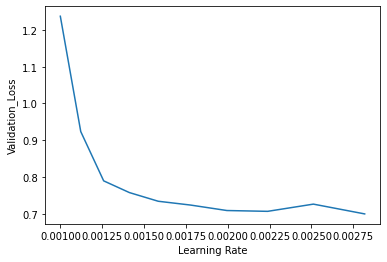

In [14]:
#lets plot learning rate vs validation loss
plt.plot(pd.DataFrame(history_3.history)["lr"],pd.DataFrame(history_3.history)["val_loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Validation_Loss")

In [15]:
tf.random.set_seed=42
#create the model
minst_model_4=tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(4,activation="relu"),
     tf.keras.layers.Dense(10,activation="softmax")
    ]
    )
#Compile the model
minst_model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.00125),
                      metrics=["accuracy"])
#Fit the model
history_4= minst_model_4.fit(train_data_norm,
                           train_labels,
                           epochs=20,
                           validation_data=(test_data_norm,test_labels)
                           )

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.3995 - accuracy: 0.4444 - val_loss: 1.1070 - val_accuracy: 0.5621
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0029 - accuracy: 0.6023 - val_loss: 0.9442 - val_accuracy: 0.6236
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8540 - accuracy: 0.6536 - val_loss: 0.8266 - val_accuracy: 0.6601
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7870 - accuracy: 0.6741 - val_loss: 0.8024 - val_accuracy: 0.6822
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7487 - accuracy: 0.6943 - val_loss: 0.7413 - val_accuracy: 0.7016
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6902 - accuracy: 0.7218 - val_loss: 0.7142 - val_accuracy: 0.7181
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6667 - accuracy: 0.7332 - val_loss: 0.6867 - val_accuracy:

In [16]:
from prompt_toolkit.layout.containers import HorizontalAlign
from pandas.core.dtypes.common import classes
import itertools
from sklearn.metrics import confusion_matrix
import numpy as np

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(20, 20), text_size=15):
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [17]:
y_probs=minst_model_4.predict(test_data_norm)
#View the predictions
y_probs[0:2]

313/313 [==============================] - 1s 4ms/step


array([[1.1836383e-30, 1.2642059e-04, 4.0913120e-11, 6.2086403e-22,
        2.2901786e-10, 1.0991565e-01, 2.3807034e-15, 3.7031442e-02,
        5.4588776e-19, 8.5292655e-01],
       [1.5925054e-02, 2.9298533e-03, 6.1350811e-01, 1.4315889e-03,
        9.2562363e-02, 1.0424639e-03, 2.7231011e-01, 9.7034456e-07,
        2.3156189e-04, 5.7893540e-05]], dtype=float32)

In [18]:
y_pred=y_probs.argmax(axis=1)
y_pred

array([9, 2, 1, ..., 4, 1, 5])

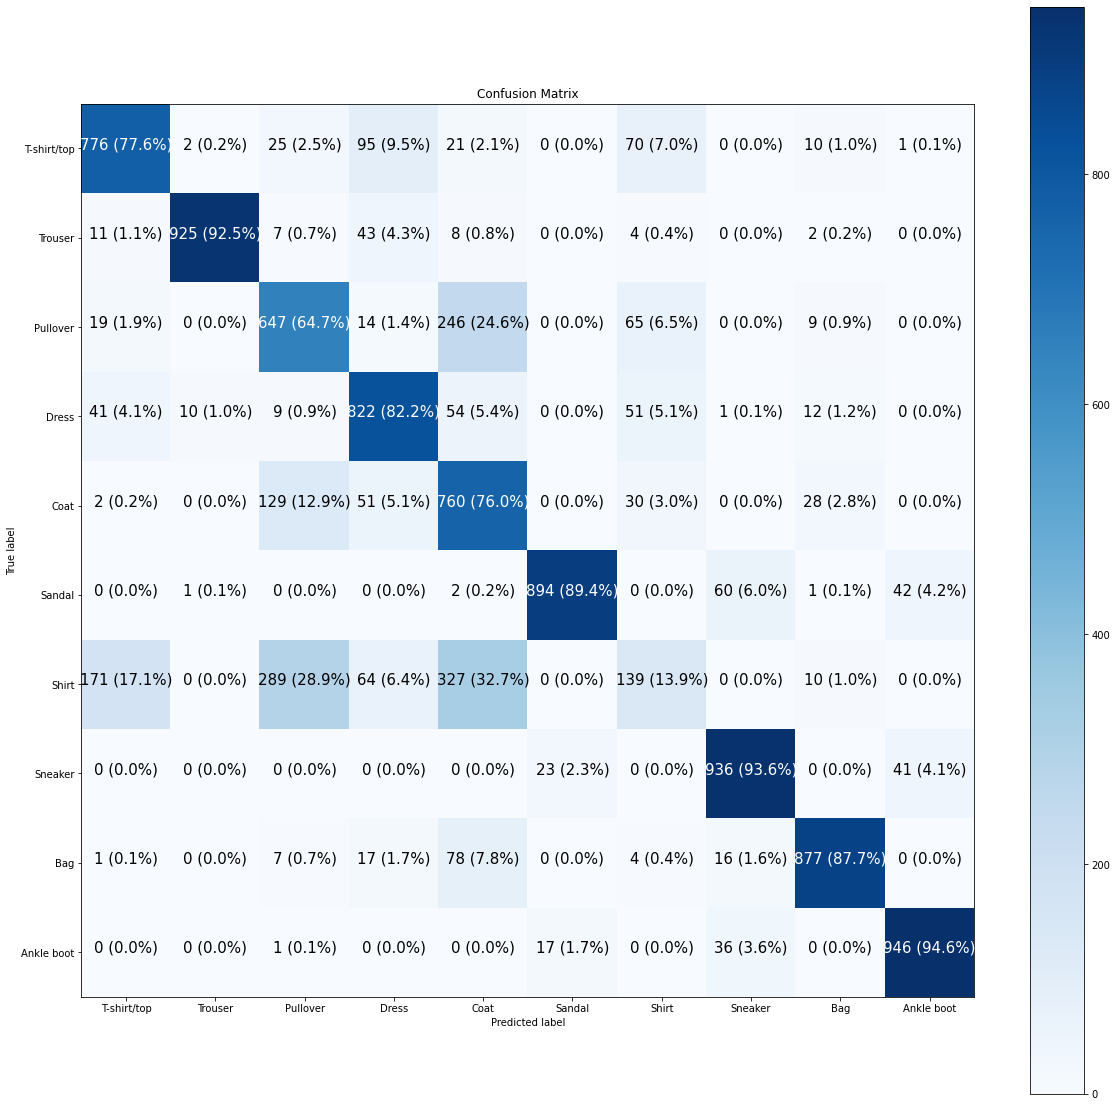

In [19]:
#create the confusion matrix
make_confusion_matrix(test_labels,y_pred,class_names)

We could see that our model is getting confused between T-Shirt, shirt and pullover which is totally fair. Based on this we can make desions for further improving our model. We can take decision like to combine these classed in to one or get more data for theses classes so that the model learns properly about these.

Now lets see what is happening behind the secene. For that we can explore the more detailed architecure for our model.

In [20]:
#Extract one layer from the model
minst_model_4.layers[1]

In [21]:
weigths,biases=minst_model_4.layers[1].get_weights()
weigths,weigths.shape,biases

(array([[-0.07363696,  0.86171097,  0.06974804, -0.66857445],
        [ 0.4607201 ,  1.5477455 ,  0.21017766, -0.25204748],
        [ 0.38240054,  0.10564725, -0.3453309 , -1.3746715 ],
        ...,
        [ 0.8322005 , -0.37746793,  1.038489  , -0.27459607],
        [ 1.1653494 , -0.2305202 ,  0.34294093, -0.51131517],
        [ 0.5647726 ,  1.1068001 , -0.5181903 , -0.312835  ]],
       dtype=float32),
 (784, 4),
 array([0.23847647, 2.4671824 , 1.3400686 , 2.1188989 ], dtype=float32))

In [22]:
minst_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


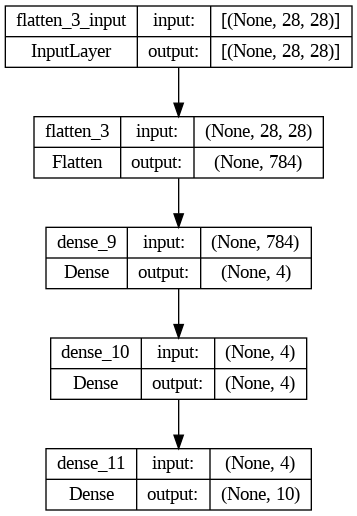

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(minst_model_4,show_shapes=True)